In [8]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2 as cv
import re

In [22]:
def extract_position(input_name):
    # Use regex to find the 'Position' part
    match = re.search(r'Position \d+ - \d+_Z\d+_C\d+', input_name)
    if match:
        return match.group(0)
    else:
        return "Unknown_Position"

In [14]:
folder1 = 'E:\MLOps\Project\Images from Dellaire Lab\TIFF SAEC rep1 63X no As\C0'

In [15]:
folder2 = 'E:\MLOps\Project\Images from Dellaire Lab\TIFF SAEC rep1 63X no As\C1'

In [16]:
output_folder = 'E:\MLOps\Project\Images from Dellaire Lab\TIFF SAEC rep1 63X no As\pml_transformed'

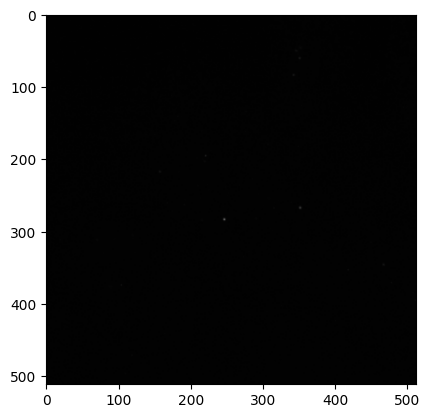

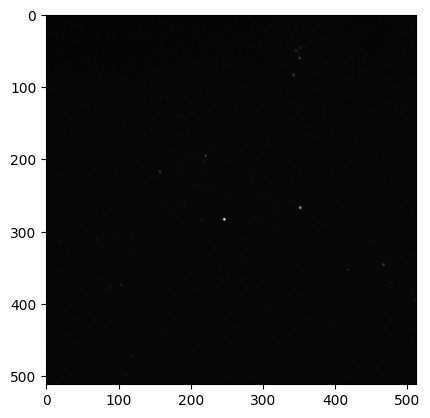

In [7]:
image = cv.imread('pml1.tif')

new_image = np.zeros(image.shape, image.dtype)
## [basic-linear-transform-output]

alpha = 3.5
beta = 0

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)


threshold = 50
gray_image = cv.cvtColor(new_image, cv.COLOR_BGR2GRAY)

# Create a mask for the white dots (any pixel above the threshold is considered a white dot)
mask = gray_image > threshold

# Set the corresponding pixels to bright red in the BGR image
new_image[mask] = [0, 255, 0]  # BGR for red: (0, 0, 255)


plt.imshow(image)
plt.show()
plt.imshow(new_image)
plt.show()

In [23]:
images1 = sorted(os.listdir(folder1))
images2 = sorted(os.listdir(folder2))

alpha = 4.5
beta = 0

for img1_name , img2_name in zip(images1,images2):
    img_path = 'Images from Dellaire Lab/TIFF SAEC rep1 63x no As/C1/' + img2_name
    print(img_path)
    image = cv.imread(img_path)

    new_image = np.zeros(image.shape, image.dtype)
    ## [basic-linear-transform-output]

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
    threshold = 50
    gray_image = cv.cvtColor(new_image, cv.COLOR_BGR2GRAY)

    # Create a mask for the white dots (any pixel above the threshold is considered a white dot)
    mask = gray_image > threshold

    # Set the corresponding pixels to bright red in the BGR image
    new_image[mask] = [0, 255, 0]  # BGR for red: (0, 0, 255)


    position = extract_position(img_path)
    print(position)
    cv.imwrite(f'Images from Dellaire Lab/TIFF SAEC rep1 63x no As/pml_transformed/transformed_pml - {position}.jpg', new_image)
    
    


Images from Dellaire Lab/TIFF SAEC rep1 63x no As/C1/SAEC exp1 no As 63x - Position 1 - 1_Z00_C1.tif
Position 1 - 1_Z00_C1
Images from Dellaire Lab/TIFF SAEC rep1 63x no As/C1/SAEC exp1 no As 63x - Position 1 - 1_Z01_C1.tif
Position 1 - 1_Z01_C1
Images from Dellaire Lab/TIFF SAEC rep1 63x no As/C1/SAEC exp1 no As 63x - Position 1 - 1_Z02_C1.tif
Position 1 - 1_Z02_C1
Images from Dellaire Lab/TIFF SAEC rep1 63x no As/C1/SAEC exp1 no As 63x - Position 1 - 1_Z03_C1.tif
Position 1 - 1_Z03_C1
Images from Dellaire Lab/TIFF SAEC rep1 63x no As/C1/SAEC exp1 no As 63x - Position 1 - 1_Z04_C1.tif
Position 1 - 1_Z04_C1
Images from Dellaire Lab/TIFF SAEC rep1 63x no As/C1/SAEC exp1 no As 63x - Position 1 - 1_Z05_C1.tif
Position 1 - 1_Z05_C1
Images from Dellaire Lab/TIFF SAEC rep1 63x no As/C1/SAEC exp1 no As 63x - Position 1 - 1_Z06_C1.tif
Position 1 - 1_Z06_C1
Images from Dellaire Lab/TIFF SAEC rep1 63x no As/C1/SAEC exp1 no As 63x - Position 1 - 1_Z07_C1.tif
Position 1 - 1_Z07_C1
Images from Dell

KeyboardInterrupt: 

In [ ]:
alpha = 1.0
alpha_max = 500
beta = 0
beta_max = 200
gamma = 1.0
gamma_max = 200

def basicLinearTransform():
    res = cv.convertScaleAbs(img_original, alpha=alpha, beta=beta)
    img_corrected = cv.hconcat([img_original, res])
    cv.imshow("Brightness and contrast adjustments", img_corrected)

def gammaCorrection():
    ## [changing-contrast-brightness-gamma-correction]
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

    res = cv.LUT(img_original, lookUpTable)
    ## [changing-contrast-brightness-gamma-correction]

    img_gamma_corrected = cv.hconcat([img_original, res])
    cv.imshow("Gamma correction", img_gamma_corrected)

def on_linear_transform_alpha_trackbar(val):
    global alpha
    alpha = val / 100
    basicLinearTransform()

def on_linear_transform_beta_trackbar(val):
    global beta
    beta = val - 100
    basicLinearTransform()

def on_gamma_correction_trackbar(val):
    global gamma
    gamma = val / 100
    gammaCorrection()



img_original = cv.imread('dapi1.tif')


img_corrected = np.empty((img_original.shape[0], img_original.shape[1]*2, img_original.shape[2]), img_original.dtype)
img_gamma_corrected = np.empty((img_original.shape[0], img_original.shape[1]*2, img_original.shape[2]), img_original.dtype)

img_corrected = cv.hconcat([img_original, img_original])
img_gamma_corrected = cv.hconcat([img_original, img_original])

cv.namedWindow('Brightness and contrast adjustments')
cv.namedWindow('Gamma correction')

alpha_init = int(alpha *100)
cv.createTrackbar('Alpha gain (contrast)', 'Brightness and contrast adjustments', alpha_init, alpha_max, on_linear_transform_alpha_trackbar)
beta_init = beta + 100
cv.createTrackbar('Beta bias (brightness)', 'Brightness and contrast adjustments', beta_init, beta_max, on_linear_transform_beta_trackbar)
gamma_init = int(gamma * 100)
cv.createTrackbar('Gamma correction', 'Gamma correction', gamma_init, gamma_max, on_gamma_correction_trackbar)

on_linear_transform_alpha_trackbar(alpha_init)
on_gamma_correction_trackbar(gamma_init)

cv.waitKey()

In [ ]:
plt.imshow(merged)
plt.show()

In [ ]:
img1_path = os.path.join(folder1, img1_name)
    img2_path = os.path.join(folder2, img2_name)
    print(img1_path)
    print(img2_path)
    image1 = Image.open(img1_path)
    image2 = Image.open(img2_path)
    print(image1.mode)
    print(image2.mode)
    img1_rgba = image1.convert('rgba')
    img2_rgba = image2.convert('rgba')
    
    plt.imshow(img1_rgba)
    plt.show()
    plt.imshow(img2_rgba)
    plt.show()
    jittered_image1 = color_jitter(img1_rgba)
    jittered_image2 = color_jitter(img2_rgba)
    merged_image = Image.blend(jittered_image1,jittered_image2,alpha)
    output_image_path = os.path.join(output_folder, f"merged_{img1_name}")
    merged_image.save(output_image_path)
    print(f"Saved merged image: {output_image_path}")